In [2]:
import matplotlib as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [37]:
data_dir = 'New_Train'
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "training",
    seed = 123,
    image_size = (28, 28),
    batch_size = 16
)


Found 708 files belonging to 3 classes.
Using 567 files for training.


In [36]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "validation",
    seed = 123,
    image_size = (28, 28),
    batch_size = 16
)



Found 708 files belonging to 3 classes.
Using 141 files for validation.


In [38]:
class_names = train_ds.class_names
print(class_names)

['Blank', 'Cross', 'Zeroes']


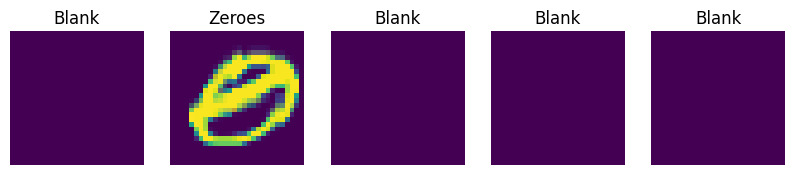

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(5):
    ax = plt.subplot(1, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [9]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(5, 28, 28, 3)
(5,)


In [27]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [12]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(28, 28, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 28, 28, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          1

In [12]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = epochs
)
num_classes = len(class_names)

NameError: name 'model' is not defined

In [39]:
img_height = 28
img_width = 28
num_classes = len(class_names)
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomFlip("vertical",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [91]:

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(64, activation='softmax'),
  layers.Dense(num_classes, name="outputs")
])

In [92]:
model.compile(optimizer='rmsprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [34]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 28, 28, 3)         0         
                                                                 
 rescaling_2 (Rescaling)     (None, 28, 28, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                 

In [ ]:
epochs = 100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/100
36/36 [==============================] - 1s 10ms/step - loss: 1.0324 - accuracy: 0.5062 - val_loss: 0.9754 - val_accuracy: 0.6950
Epoch 2/100
36/36 [==============================] - 0s 9ms/step - loss: 0.9396 - accuracy: 0.6473 - val_loss: 0.8910 - val_accuracy: 0.6950
Epoch 3/100
36/36 [==============================] - 0s 9ms/step - loss: 0.8950 - accuracy: 0.6526 - val_loss: 0.8628 - val_accuracy: 0.6950
Epoch 4/100
36/36 [==============================] - 0s 9ms/step - loss: 0.8710 - accuracy: 0.6526 - val_loss: 0.8439 - val_accuracy: 0.6950
Epoch 5/100
36/36 [==============================] - 0s 9ms/step - loss: 0.8527 - accuracy: 0.6526 - val_loss: 0.8268 - val_accuracy: 0.6950
Epoch 6/100
36/36 [==============================] - 0s 9ms/step - loss: 0.8359 - accuracy: 0.6526 - val_loss: 0.8110 - val_accuracy: 0.6950
Epoch 7/100
36/36 [==============================] - 0s 8ms/step - loss: 0.8203 - accuracy: 0.6526 - val_loss: 0.7959 - val_accuracy: 0.6950
Epoch 8/100


In [44]:
img = tf.keras.utils.load_img(
    'Train/Cross/183.png',
    target_size  = (28, 28)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 30ms/step
This image most likely belongs to Cross with a 67.55 percent confidence.


In [90]:
model.save("jupyter-model-3.keras")